In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
losses = ["barlow_twins", "hsic"]
datasets = ["WikiCS", "Amazon-CS", "Amazon-Photo", "Coauthor-CS", "Coauthor-Physics", "ogbn-arxiv", "PPI"]

In [3]:
dfs = {
    loss: {
        name: pd.read_csv(
            f"../../data/ssl/{loss}/{name}/hps.csv", 
            converters={
                "accuracy": lambda x: json.loads(x.replace("'", "\""))["test"],
                "f1": lambda x: json.loads(x.replace("'", "\""))["test"],
            }
        ) if os.path.exists(f"../../data/ssl/{loss}/{name}/hps.csv") else pd.DataFrame()
        for name in datasets
    }
    for loss in losses
}

dfs["barlow_twins"]["WikiCS"].head()

,p_x,p_e,accuracy
0,0.0,0.0,0.706687
1,0.0,0.1,0.719001
2,0.0,0.2,0.730973
3,0.0,0.3,0.761245
4,0.0,0.4,0.765008


In [4]:
print("MAX:")

for loss in losses:
    print("-" * 20, loss, "-" * 20)
    for name in datasets:
        metric = "f1" if name == "PPI" else "accuracy"
        
        print(name)
        _df = dfs[loss][name]
        print(_df[_df[metric] == _df[metric].max()])

MAX:
-------------------- barlow_twins --------------------
WikiCS
    p_x  p_e  accuracy
11  0.1  0.5    0.7804
Amazon-CS
    p_x  p_e  accuracy
11  0.1  0.5  0.884748
Amazon-Photo
    p_x  p_e  accuracy
19  0.3  0.1  0.928431
Coauthor-CS
    p_x  p_e  accuracy
17  0.2  0.5  0.930997
Coauthor-Physics
    p_x  p_e  accuracy
17  0.2  0.5  0.951294
ogbn-arxiv
   p_x  p_e  accuracy
4  0.0  0.4  0.697817
PPI
   p_x  p_e        f1
6  0.1  0.0  0.583621
-------------------- hsic --------------------
WikiCS
   p_x  p_e  accuracy
8  0.1  0.2    0.7804
Amazon-CS
    p_x  p_e  accuracy
10  0.1  0.4  0.885112
Amazon-Photo
    p_x  p_e  accuracy
22  0.3  0.4  0.927451
Coauthor-CS
    p_x  p_e  accuracy
10  0.1  0.4  0.930929
Coauthor-Physics
    p_x  p_e  accuracy
17  0.2  0.5  0.951475
ogbn-arxiv
   p_x  p_e  accuracy
3  0.0  0.3  0.697838
PPI
   p_x  p_e        f1
7  0.1  0.1  0.699484


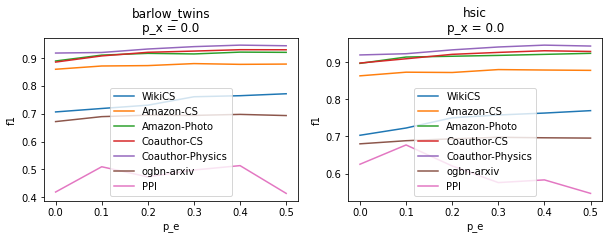

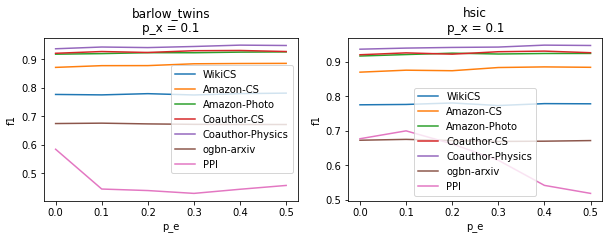

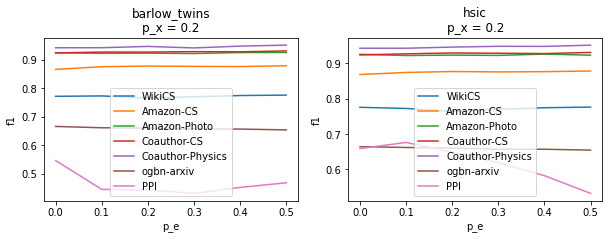

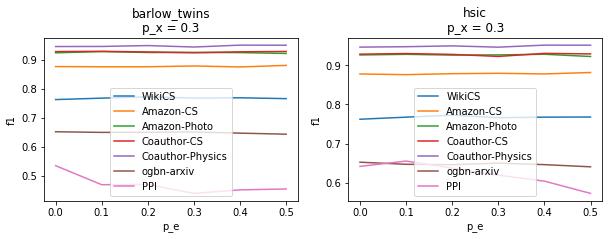

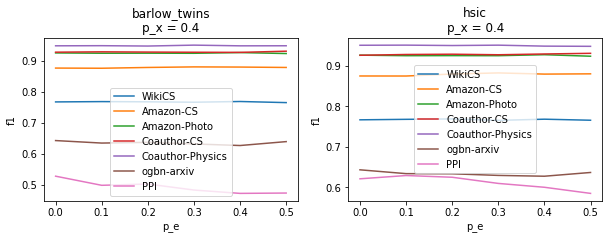

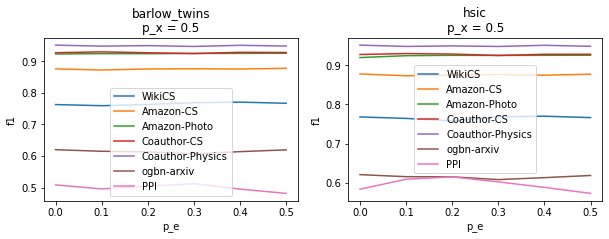

In [5]:
for p_x in dfs["barlow_twins"]["WikiCS"].p_x.unique():
    fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
    
    for loss, ax in zip(losses, axs.ravel()):
        for name in datasets:
            metric = "f1" if name == "PPI" else "accuracy"
            
            _df = dfs[loss][name][dfs[loss][name].p_x == p_x]
            ax.plot(_df.p_e, _df[metric], label=name)
        
        ax.set(title=f"{loss}\np_x = {p_x}", xlabel="p_e", ylabel=metric)
        ax.legend()

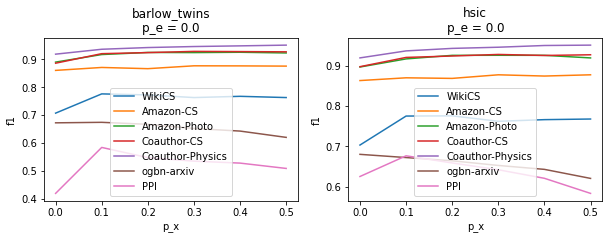

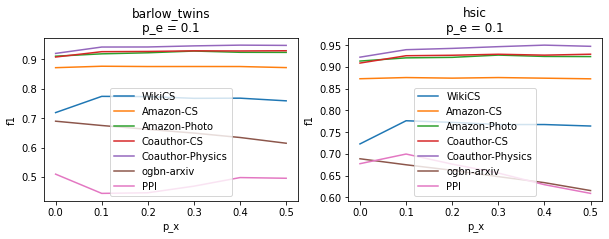

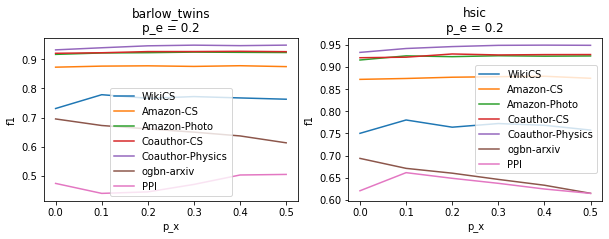

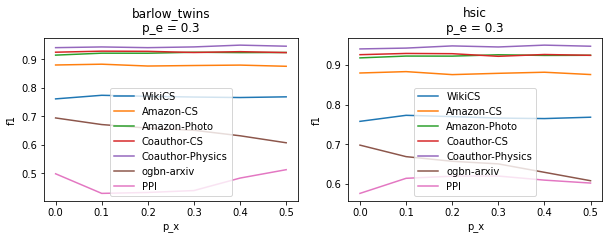

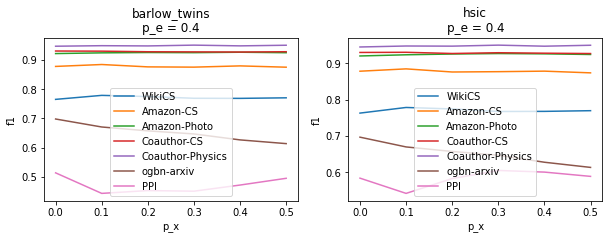

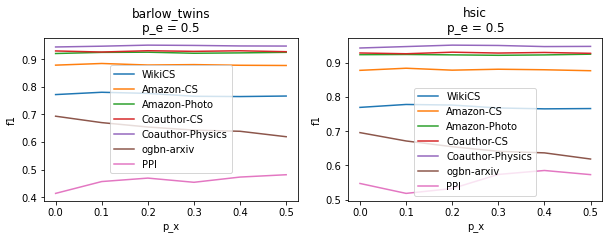

In [6]:
for p_e in dfs["barlow_twins"]["WikiCS"].p_e.unique():
    fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
    
    for loss, ax in zip(losses, axs.ravel()):
        for name in datasets:
            metric = "f1" if name == "PPI" else "accuracy"
            
            _df = dfs[loss][name][dfs[loss][name].p_e == p_e]
            ax.plot(_df.p_x, _df[metric], label=name)
        
        ax.set(title=f"{loss}\np_e = {p_e}", xlabel="p_x", ylabel=metric)
        ax.legend()